In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy import stats
import scipy.signal as sg

import matplotlib as mpl
import matplotlib.cm  as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import plot_recipes as pr

In [2]:
with Dataset(f'../netcdf/Model/gigatl1_1h_tides_para_7063_lucky_mooring_64.nc', 'r') as nc:
        time = nc['time'][:]
        #print(nc.variables)
        lon = np.array(nc['lon'][:])
        lat = np.array(nc['lat'][:])
        z = np.array(nc['z'][:])
        time = np.array(nc['time'][:])
        temp = np.array(nc['temp'][:])

In [3]:
dt = time[1] - time[0]
dt/3600 # hours

3.0

In [4]:
pd.to_datetime(time)

DatetimeIndex(['1970-01-01 00:00:00.906778736',
               '1970-01-01 00:00:00.906789536',
               '1970-01-01 00:00:00.906800336',
               '1970-01-01 00:00:00.906811136',
               '1970-01-01 00:00:00.906821936',
               '1970-01-01 00:00:00.906832736',
               '1970-01-01 00:00:00.906843536',
               '1970-01-01 00:00:00.906854336',
               '1970-01-01 00:00:00.906865136',
               '1970-01-01 00:00:00.906875936',
               ...
               '1970-01-01 00:00:00.921358736',
               '1970-01-01 00:00:00.921369536',
               '1970-01-01 00:00:00.921380336',
               '1970-01-01 00:00:00.921391136',
               '1970-01-01 00:00:00.921401936',
               '1970-01-01 00:00:00.921412736',
               '1970-01-01 00:00:00.921423536',
               '1970-01-01 00:00:00.921434336',
               '1970-01-01 00:00:00.921445136',
               '1970-01-01 00:00:00.921455936'],
              dtype=

In [5]:
lat

array([37.28162615])

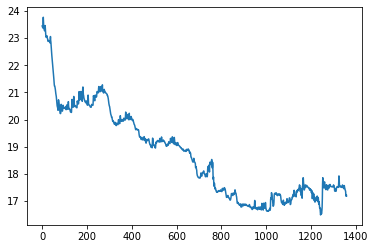

In [6]:
plt.plot(temp[:, 99, 0, 0])

In [7]:
depth = z[0, :, 0, 0]
tt = np.linspace(0, 1360, 1360)

In [8]:
xx,yy = np.mgrid[slice(0, 1360, 1), slice(-1750, 0, 17.5)]

In [9]:
z[0, 0]

array([[-1763.83119007]])

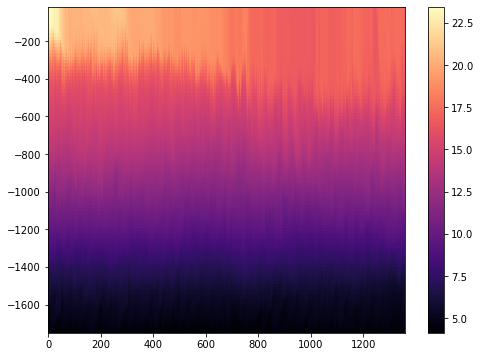

In [10]:
plt.figure(figsize=(8,6))
plt.pcolormesh(xx,yy, temp[:,:, 0, 0], cmap='magma')
plt.colorbar()

M2 = 2.2583559168925024e-05


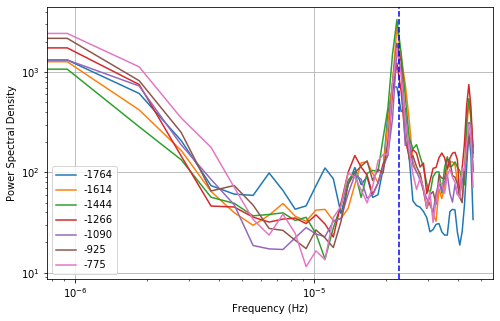

In [11]:
plt.figure(figsize=(8,5))
window_size = 100
levels = range(0,32,5)

for l in levels:
    T = temp[:, l, 0, 0]
    dt = time[1] - time[0] #seconds
    
    freq, psd = sg.welch(T, fs=1./dt, nperseg=window_size, noverlap=0)
    
    plt.loglog(freq, psd, label=f'{z[0,l,0,0]:.0f}')

M2 = 1/(12.3*3600) # 1/(12.42*3600) # M2
print(f'M2 = {M2}')
plt.axvline(M2,color='blue',alpha=1,ls='--')

plt.grid(True)
#plt.xlim([1e-2,freq.max()])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power Spectral Density')
plt.legend()

In [12]:
year = 2019

with Dataset(f'../netcdf/{year}/rbr.nc', 'r') as nc:
    
    n_depths = len(nc['DEPTH'][:])
    depth_rbr = np.array(nc['DEPTH'][:])
    temp = np.array(nc['TEMP'][:])
    time = np.array(nc['TIME'][:])
    
time = pd.to_datetime(time, unit='D', origin='1950-01-01 00:00')
df = pd.DataFrame(temp, columns=depth_rbr)
#temp_year = df.to_dict()
means_rbr = df.mean().values 

In [15]:
temp.shape

(1668980, 10)

In [16]:
plt.figure(figsize=(8,5))
window_size = 100
#levels = [3]
#for l in levels:

T = temp[:, 3]
dt = time[1] - time[0] #seconds
freq, psd = sg.welch(T, fs=1./dt, nperseg=100, noverlap=0)

plt.loglog(freq, psd, label=f'Model {z[0,l,0,0]:.0f}m')

T = df[1660]
dt = 15 #seconds
freq, psd = sg.welch(T, fs=1./dt, nperseg=100000, noverlap=0)
plt.loglog(freq, psd, label=f'RBR 1669m')

M2 = 1/(12.3*3600) # 1/(12.42*3600) # M2
print(f'M2 = {M2}')
plt.axvline(M2,color='blue',alpha=1,ls='--')

plt.grid(True)
#plt.xlim([1e-2,freq.max()])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power Spectral Density  ')
plt.legend()

TypeError: unsupported operand type(s) for /: 'float' and 'Timedelta'

<Figure size 576x360 with 0 Axes>

In [ ]:
df.keys()

In [ ]:
for i,k in enumerate(z[0, :30, 0, 0]):
    print(i,k)

In [ ]:
plt.figure(figsize=(8,5))
window_size = 100
#levels = [3]
#for l in levels:

T = temp[:, 29, 0, 0]
print('z model = ', z[0, 29, 0, 0])
dt = time[1] - time[0] #seconds
freq, psd = sg.welch(T, fs=1./dt, nperseg=100, noverlap=0)

plt.loglog(freq, psd, label=f'Model {z[0,29,0,0]:.0f}m')

T = df[800]
print('RBR = ', 800)
dt = 15 #seconds
freq, psd = sg.welch(T, fs=1./dt, nperseg=100000, noverlap=0)
plt.loglog(freq, psd, label=f'RBR 800m')

M2 = 1/(12.3*3600) # 1/(12.42*3600) # M2
print(f'M2 = {M2}')
plt.axvline(M2,color='blue',alpha=1,ls='--')

plt.grid(True)
#plt.xlim([1e-2,freq.max()])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power Spectral Density')
plt.legend()

In [ ]:
plt.figure(figsize=(8,5))
window_size = 100
#levels = [3]
#for l in levels:
m = 14

T = temp[:, m, 0, 0]
print('z model = ', z[0, m, 0, 0])
dt = time[1] - time[0] #seconds
freq, psd = sg.welch(T, fs=1./dt, nperseg=100, noverlap=0)

plt.loglog(freq, psd, label=f'Model {z[0,m,0,0]:.0f}m')

T = df[1300]
print('RBR = ', 1300)
dt = 15 #seconds
freq, psd = sg.welch(T, fs=1./dt, nperseg=100000, noverlap=0)
plt.loglog(freq, psd, label=f'RBR 1300m')

M2 = 1/(12.3*3600) # 1/(12.42*3600) # M2
print(f'M2 = {M2}')
plt.axvline(M2,color='blue',alpha=1,ls='--')

plt.grid(True)
#plt.xlim([1e-2,freq.max()])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power Spectral Density')
plt.legend()